In [1]:
import pandas as pd
dataset=pd.read_csv("reliance_data.csv", parse_dates=['Date'], index_col='Date')

In [2]:
dataset

,Close,High,Low,Open
Date,,,,
2021-06-01,987.374939,1002.443448,977.177463,986.054707
2021-06-02,1002.101929,1005.857676,981.957442,981.957442
2021-06-03,1005.925964,1024.294990,999.757459,1011.092917
2021-06-04,997.208130,1009.021637,994.362841,1008.270487
2021-06-07,1014.006531,1020.653085,994.704287,1002.443427
...,...,...,...,...
2022-04-25,1231.155029,1260.117952,1216.833432,1252.808769
2022-04-26,1267.998169,1276.837847,1236.956647,1238.007307
2022-04-27,1269.231689,1291.913249,1258.587463,1258.952988


In [3]:
#Start date and end_date
from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("2021-06-01")
end_date = pd.to_datetime("2022-05-01") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

In [4]:
all_date

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30'],
              dtype='datetime64[ns]', length=334, freq='D')

In [5]:
dummyDate=dataset

In [6]:
print(len(dummyDate))    # number of rows in DataFrame
print(len(all_date))     # number of dates you are assigning

228
334


In [7]:
dummyDate = dummyDate.reindex(all_date)  
dummyDate.ffill(inplace=True)

In [8]:
dummyDate.index = all_date[:len(dummyDate)]

In [9]:
dummyDate.index=all_date

In [10]:
dummyDate

,Close,High,Low,Open
2021-06-01,987.374939,1002.443448,977.177463,986.054707
2021-06-02,1002.101929,1005.857676,981.957442,981.957442
2021-06-03,1005.925964,1024.294990,999.757459,1011.092917
2021-06-04,997.208130,1009.021637,994.362841,1008.270487
2021-06-05,997.208130,1009.021637,994.362841,1008.270487
...,...,...,...,...
2022-04-26,1267.998169,1276.837847,1236.956647,1238.007307
2022-04-27,1269.231689,1291.913249,1258.587463,1258.952988
2022-04-28,1288.190186,1302.420431,1272.772133,1283.667576
2022-04-29,1274.667969,1304.773022,1268.752012,1304.773022


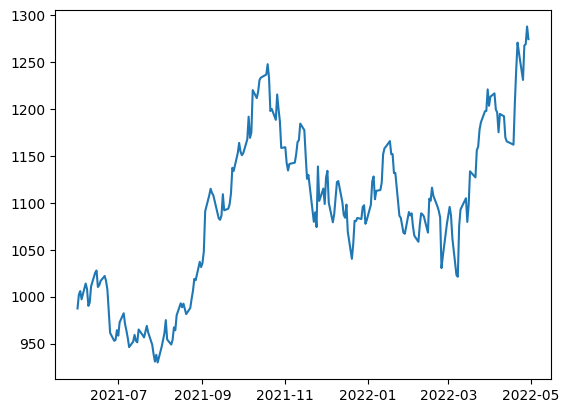

In [11]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

<Figure size 1600x500 with 0 Axes>

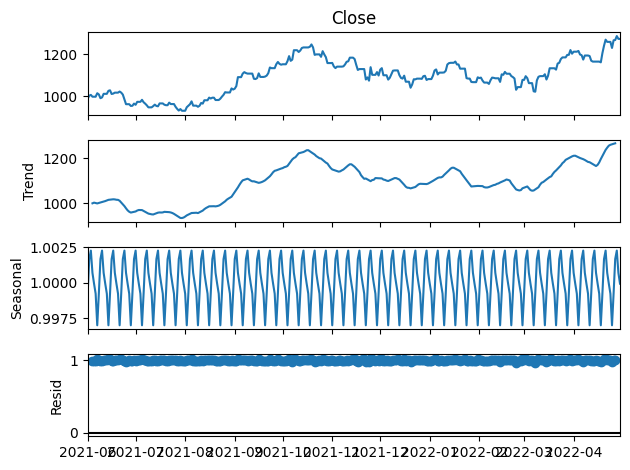

In [12]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

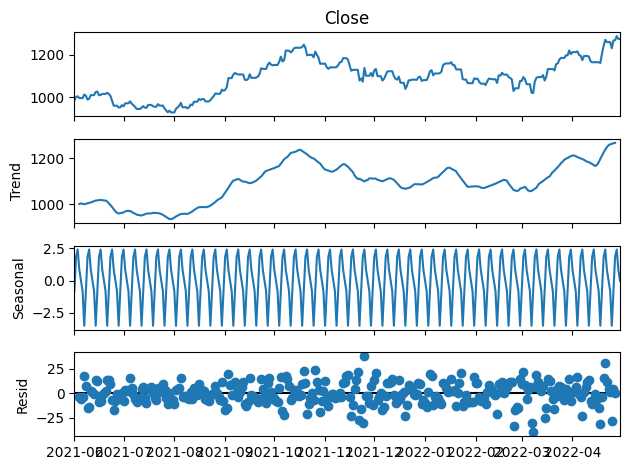

In [13]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [14]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    # Plot the data
    # ADF Test
    # Function to print out results in customised manner
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message

Results of Dickey-Fuller Test:
Test Statistic                  -0.681973
p-value                          0.851364
#Lags Used                       3.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


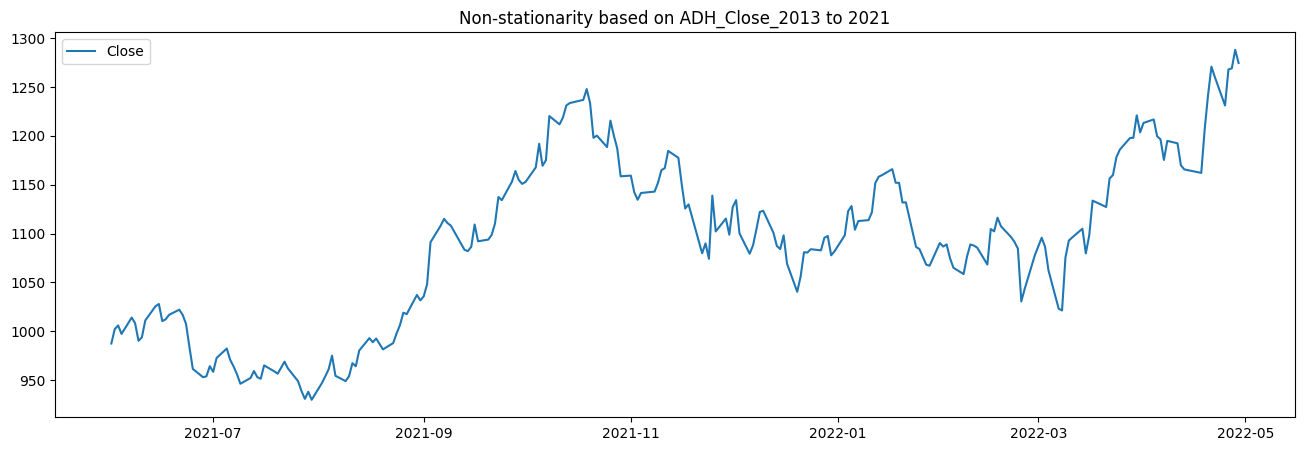

'Non-stationarity based on ADH'

In [15]:
adf_test(dataset["Close"],dataset,"Close")

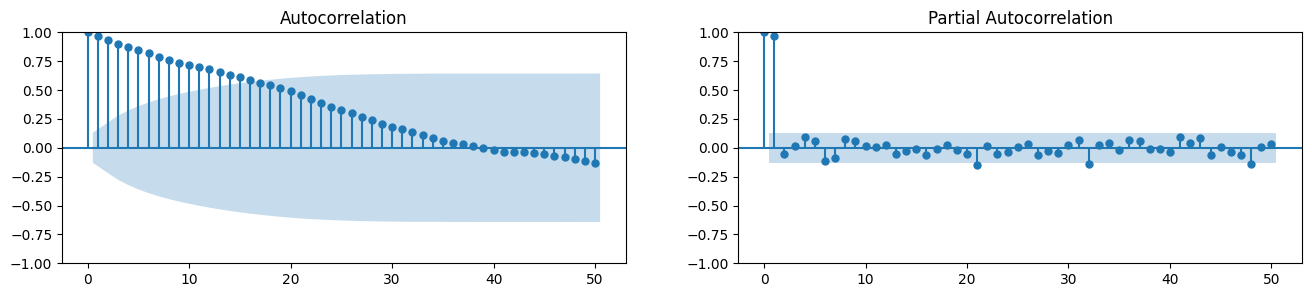

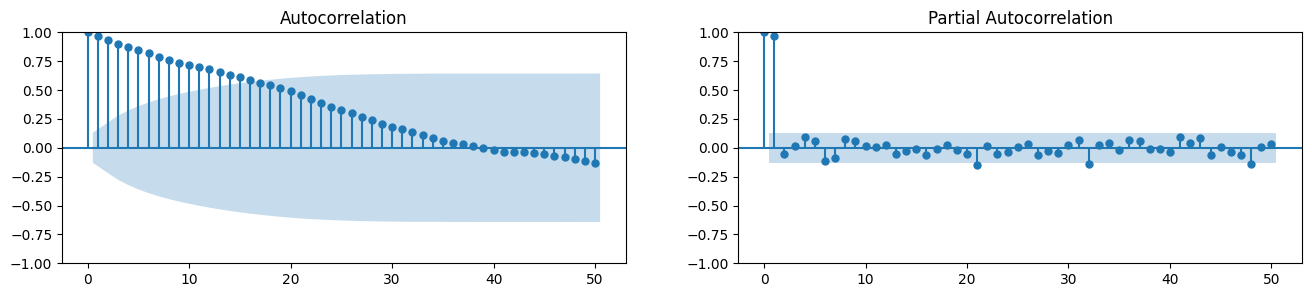

In [16]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.Close.tolist(), lags=50, ax=axes[1])

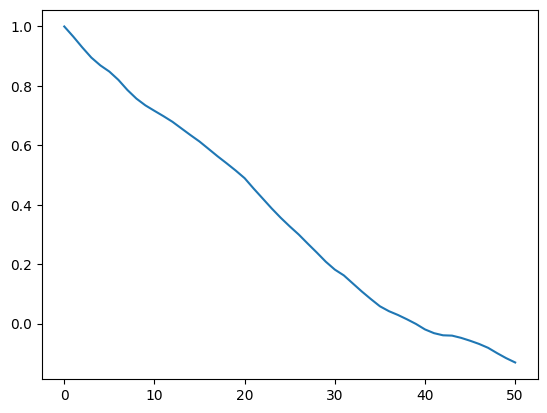

In [17]:
plt.plot(acf(dataset["Close"],nlags=50))

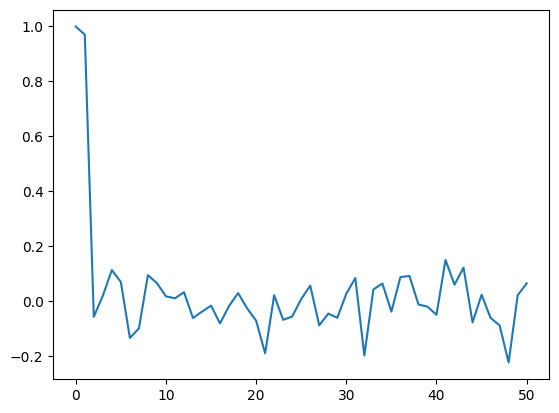

In [18]:
plt.plot(pacf(dataset["Close"],nlags=50))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

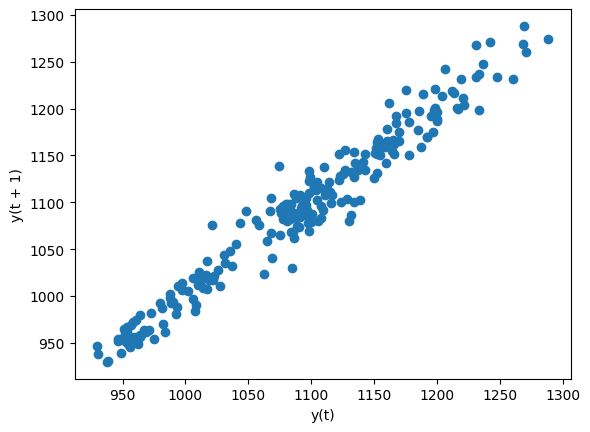

In [19]:
from pandas.plotting import lag_plot
lag_plot(dataset["Close"],lag=1)

# Forecastability

# Apen small- Forecastability is possible
# Spen Small-Forecastability is possible

In [20]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [21]:
import numpy as np
print(ApEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))  

C:\Users\tiruk\AppData\Local\Temp\ipykernel_1412\2578661817.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]


0.634942576020959


In [22]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [23]:
print(SampEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))

C:\Users\tiruk\AppData\Local\Temp\ipykernel_1412\1392444303.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]


0.644300261090972
